Please input your new values separated by commas: 2
Populating the interactive namespace from numpy and matplotlib


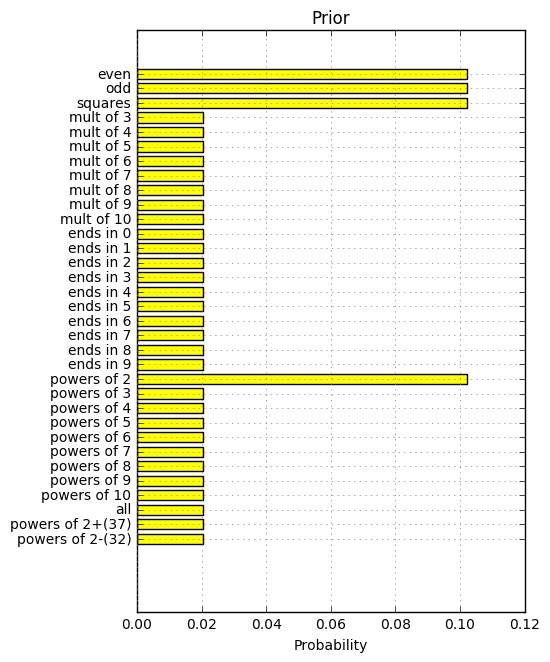

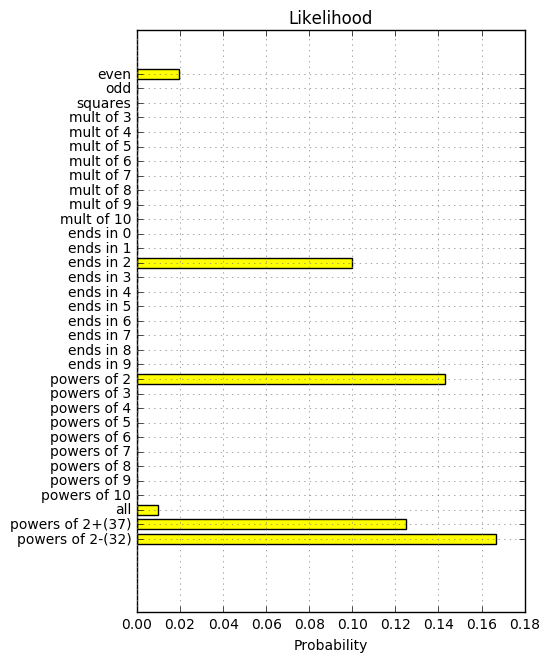

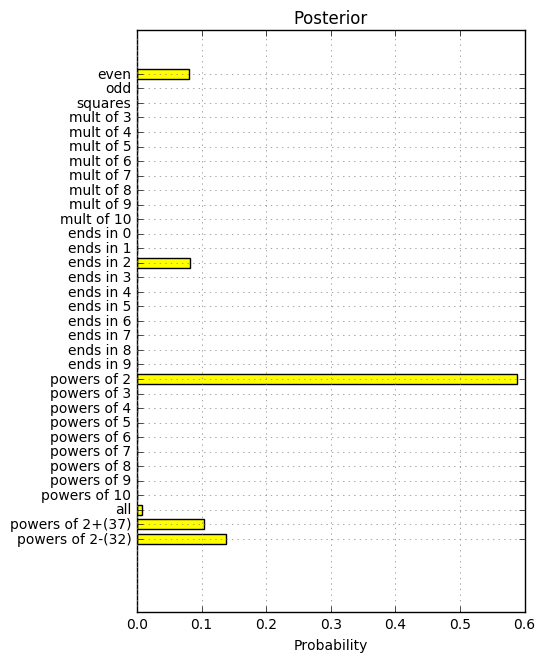

Populating the interactive namespace from numpy and matplotlib


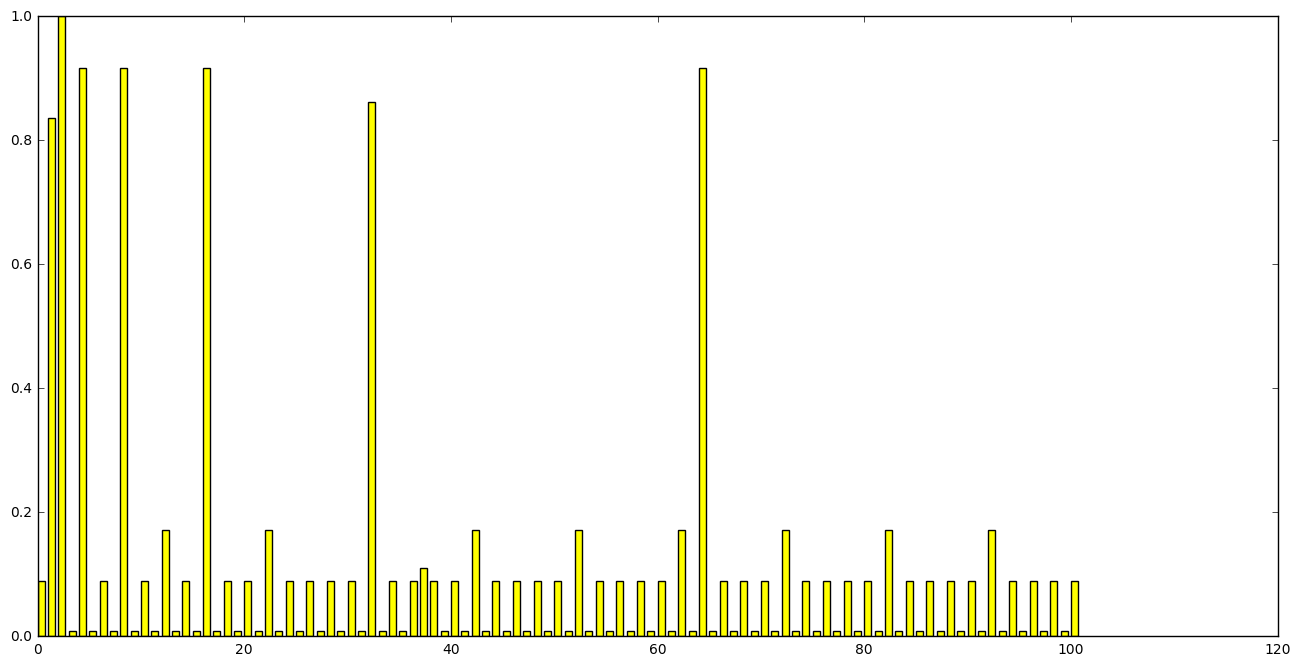

In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def plot_bar_horizontal(x, y, labels ,title = "", xlabel = "Probability"):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    fig_size[0] = 5 #width
    fig_size[1] = 7.5 #height
    plt.rcParams["figure.figsize"] = fig_size

    arry = np.array(y)
    reversedy = np.fliplr([arry])[0]
    arrlab = np.array(labels)
    reversedlab = np.fliplr([arrlab])[0]
    
    plt.barh(x, reversedy, height=0.7, align='center', color="yellow")
    
    plt.yticks(x, reversedlab, rotation='horizontal')

    plt.grid(True, color = "gray")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

concepts = ["even", "odd", "squares"]
for i in xrange(3,11):
    mult = "mult of " + str(i)
    concepts.append(mult)
    
for i in xrange(0,10):
    ends = "ends in " + str(i)
    concepts.append(ends)
    
for i in xrange(2,11):
    power = "powers of " + str(i)
    concepts.append(power)

concepts.extend(["all", "powers of 2+(37)", "powers of 2-(32)"])
#print(concepts)


data = raw_input("Please input your new values separated by commas: ")
data = [x.strip() for x in data.split(',')]
data = [int(i) for i in data]

prior = numpy.ones(len(concepts))
prior[0] = 5
prior[1] = 5
prior[2] = 5
prior[21] = 5
prior = prior / numpy.sum(prior)


# these two lines allow you to control the figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

plot_bar_horizontal([i for i in range(0,len(concepts))], prior, concepts , title = "Prior")

concept_val = []
concept_val.append([i for i in range(0, 101) if (i%2 == 0)]) #even
concept_val.append([i for i in range(0, 101) if i%2 == 1]) #odd
concept_val.append([i**2 for i in range(0,10)]) #squares

# mult
for i in xrange(3,11):
    mult_val = [j for j in range(i,101) if j%i == 0] 
    concept_val.append(mult_val)

#ends in
for i in xrange(0,10):
    end_val = [j for j in range(i,101,10)]
    concept_val.append(end_val)
    
#powers
for i in xrange(2,11):
    power_val = [i**j for j in range(0,20) if (i**j < 101)]
    concept_val.append(power_val)
    
concept_val.append([i for i in range (0,101)]) #all
powertwoplus = [2**i for i in range(0,20) if (2**i < 101)]
powertwoplus.append(37)
concept_val.append(powertwoplus) #power 2 + 37
powertwominus = [2**i for i in range(0,20) if (2**i < 101)]
powertwominus.remove(32)
concept_val.append(powertwominus) #power 2 - 32

#compute likelihood
likelihood = numpy.zeros(len(concepts))
for i in xrange(0,len(concepts)):
    if(set(data).issubset(concept_val[i])):
        likelihood[i] = (1./(len(concept_val[i])))**len(data)
        
#compute posterior
posterior = numpy.zeros(len(concepts))
for i in xrange(0,len(concepts)):
    posterior[i] = likelihood[i]*prior[i]
posterior = posterior / numpy.sum(posterior)
       
plot_bar_horizontal([i for i in range(0,len(concepts))], likelihood, concepts , title = "Likelihood")
plot_bar_horizontal([i for i in range(0,len(concepts))], posterior, concepts , title = "Posterior")

postpred = numpy.zeros(101)
for i in range(0,101):
    for j in range(0,len(concepts)):
        if i in concept_val[j]:
            postpred[i] += posterior[j]
            
            

# this tells seaborn and matplotlib to generate plots inline in the notebook
%matplotlib inline  
 
# these two lines allow you to control the figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)


width = 1/1.5
plt.bar(range(0,101),postpred , width, color="yellow")
fig = plt.show()

